        Date                          Game  Earnings  Players  Tournaments  \
0 1998-01-01  Command & Conquer: Red Alert   15000.0        8            1   
1 1998-01-01                    QuakeWorld   15000.0        8            1   
2 1998-05-01                      Quake II   15000.0        4            1   
3 1998-05-01            Total Annihilation   15000.0        2            1   
4 1998-05-01                    QuakeWorld     300.0        3            1   

   Earnings_YoY_Growth  Players_YoY_Growth  Tournaments_YoY_Growth  \
0                  NaN                 NaN                     NaN   
1                  NaN                 NaN                     NaN   
2                  NaN                 NaN                     NaN   
3                  NaN                 NaN                     NaN   
4                -98.0               -62.5                     0.0   

         Genre_Category  Release_Decade  
0              Strategy            1990  
1  First-Person Shooter   

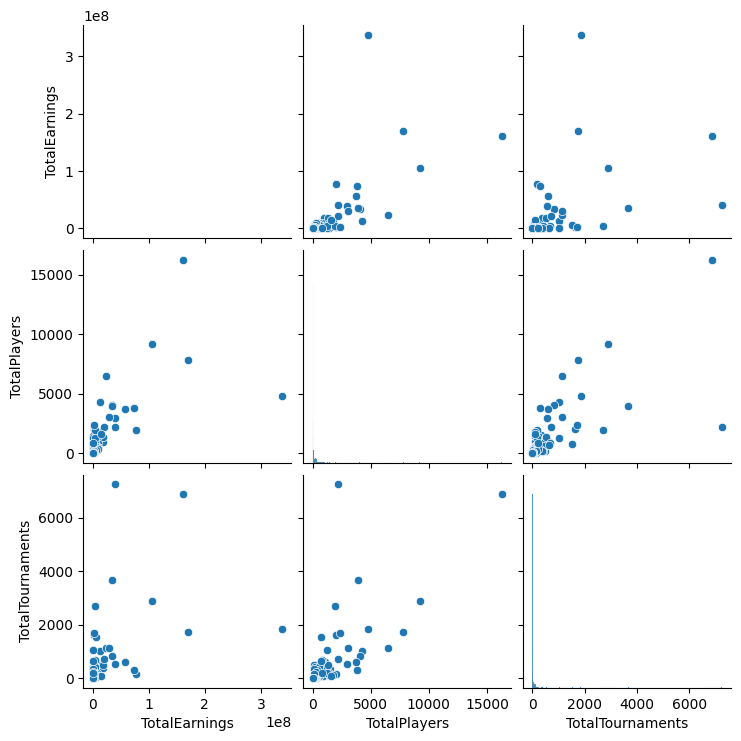

        Date                          Game  Earnings  Players  Tournaments  \
0 1998-01-01  Command & Conquer: Red Alert   15000.0        8            1   
1 1998-01-01                    QuakeWorld   15000.0        8            1   
2 1998-05-01                      Quake II   15000.0        4            1   
3 1998-05-01            Total Annihilation   15000.0        2            1   
4 1998-05-01                    QuakeWorld     300.0        3            1   

   Earnings_YoY_Growth  Players_YoY_Growth  Tournaments_YoY_Growth  \
0                  NaN                 NaN                     NaN   
1                  NaN                 NaN                     NaN   
2                  NaN                 NaN                     NaN   
3                  NaN                 NaN                     NaN   
4                -98.0               -62.5                     0.0   

         Genre_Category  Release_Decade  ReleaseDate                 Genre  \
0              Strategy         

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load general esport data
general_data = pd.read_csv("GeneralEsportData.csv")

# Load historical esport data
historical_data = pd.read_csv("HistoricalEsportData.csv", parse_dates=["Date"])

# Data Cleaning for Historical Esport Data

# Calculate year-over-year growth in earnings, player base, and tournaments
historical_data["Earnings_YoY_Growth"] = historical_data.groupby("Game")["Earnings"].pct_change() * 100
historical_data["Players_YoY_Growth"] = historical_data.groupby("Game")["Players"].pct_change() * 100
historical_data["Tournaments_YoY_Growth"] = historical_data.groupby("Game")["Tournaments"].pct_change() * 100

# Create categorical features for genre and release decade in historical data
historical_data["Genre_Category"] = historical_data["Game"].map(dict(zip(general_data["Game"], general_data["Genre"])))
historical_data["Release_Decade"] = (historical_data["Date"].dt.year // 10) * 10

# Display the updated historical data
print(historical_data.head())

# Data Cleaning for General Esport Data

# Drop unnecessary columns if needed
general_data = general_data.drop(["OfflineEarnings", "PercentOffline"], axis=1)

# Fill missing values with appropriate strategies
general_data["TotalEarnings"].fillna(general_data["TotalEarnings"].mean(), inplace=True)
general_data["TotalPlayers"].fillna(general_data["TotalPlayers"].median(), inplace=True)

# Check for missing values again
print(general_data.isna().sum())

# Explore relationships between variables
sns.pairplot(general_data[['TotalEarnings', 'TotalPlayers', 'TotalTournaments']])
plt.show()

# Merging both datasets based on the "Game" column
merged_data = pd.merge(historical_data, general_data, on="Game", how="left")

# Display the merged data
print(merged_data.head())
